In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("BigMart_Sales.csv")

In [3]:
data.shape

(8523, 12)

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Data Description:
The dataset has 8523 entries with 12 columns  
collected date:2013  

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Checks the Concentration of fat in the product

Item_Visibility: The % of total display area of all similar products in a store

Item_Type: Product Category

Item_MRP: Maximum Retail Price for a Product

Outlet_Identifier: Store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store (Area Size Category)

Outlet_Location_Type: In Terms of city Tiers (Size)

Outlet_Type: Grocery store or a type of supermarket

Item_Outlet_Sales: Sales of the product In the Specific outlet


In [7]:
#Check null values
np.sum(data.isnull())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight,Outlet_Size


In [8]:
#Check if there is duplicate rows
np.sum(data.duplicated())

0

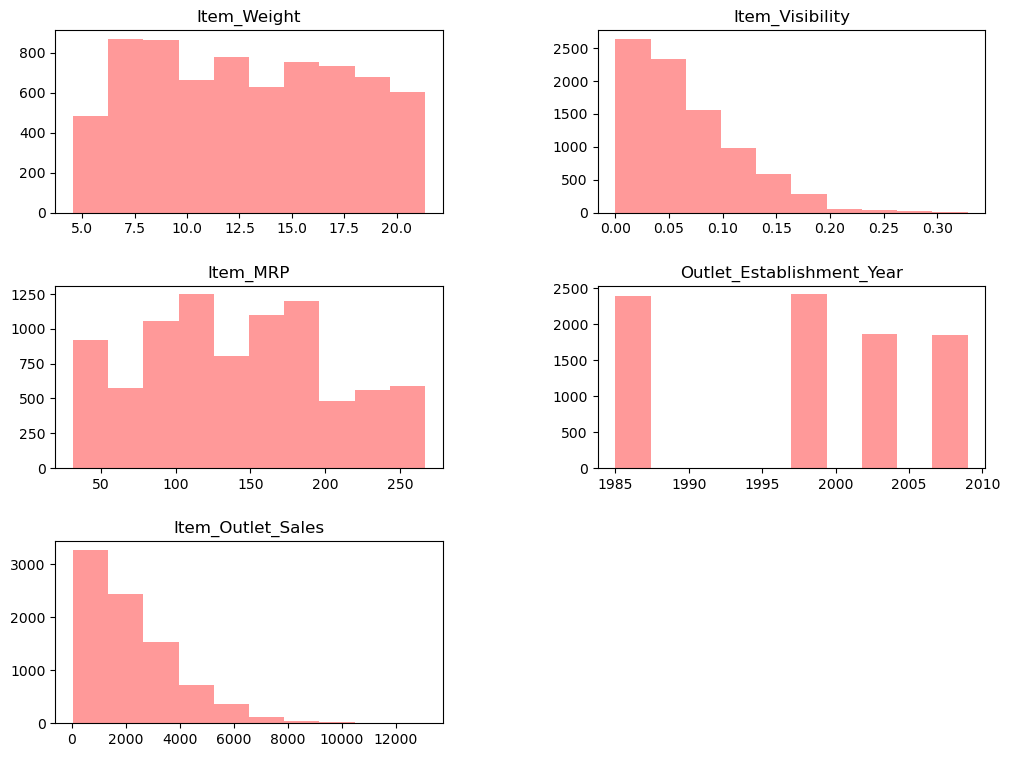

In [9]:
#Histogram of numeric variables
var_num_ind = [1,3,5,7,11]
plt.figure(figsize = (12, 9))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 6):
    plt.subplot(3,2, i)
    plt.hist(x = data.iloc[: , var_num_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_num_ind[i - 1]])

The distribution of response variable (Item_Outlet_Sales) is skewed right

In [10]:
#Summary statistics of numeric variables
data.iloc[:, var_num_ind].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


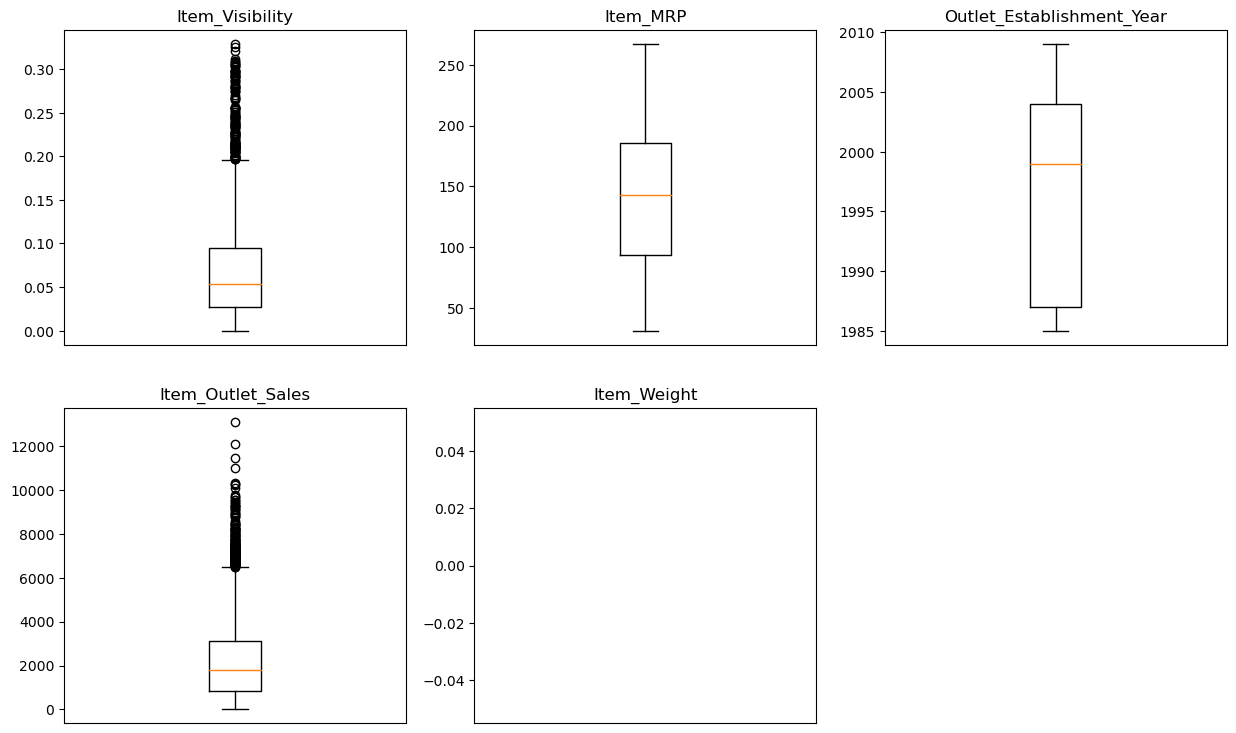

In [11]:
var_num_ind = [1,3,5,7,11,1]
#Boxplot of numeric variables
plt.figure(figsize = (15, 9))
#plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plt.boxplot(data.iloc[: , var_num_ind[i]])
    plt.xticks([]) #remove the xticks 
    plt.title(data.columns[var_num_ind[i]])

In [12]:
#Find frequency of categories
var_cat_col = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier' , 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
for col in var_cat_col:
   print (data[col].value_counts())
   print('----------------------------')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
----------------------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
----------------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
----------------------------
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017

In [13]:
# combining Item_Fat_Content misspelled
data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [14]:
(data['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

We found two variables with missing values – Item_Weight and Outlet_Size. Lets impute the former by the average weight of the particular item.


In [16]:
# filling null values
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
   

In [17]:
data.groupby('Outlet_Type').Outlet_Size.value_counts(dropna=False)

Outlet_Type        Outlet_Size
Grocery Store      NaN             555
                   Small           528
Supermarket Type1  Small          1860
                   NaN            1855
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [18]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
mode_outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_outlet_size
#Get missing Item_Weight values
miss_Outlet_Size = data['Outlet_Size'].isnull() 
data.loc[miss_Outlet_Size,'Outlet_Size'] = data.loc[miss_Outlet_Size,'Outlet_Type'].apply(lambda x: mode_outlet_size [x])


In [19]:
data.groupby('Outlet_Type').Outlet_Size.value_counts(dropna=False)

Outlet_Type        Outlet_Size
Grocery Store      Small          1083
Supermarket Type1  Small          3715
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [20]:
#Check null values
np.sum(data.isnull())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Years                 0
dtype: int64

In [21]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,15.168133
std,4.226124,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,4.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,9.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,14.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


In [22]:
#Correlation analysis
corr_table = round(data.iloc[:, var_num_ind].corr(method = 'pearson'), 2)
corr_table


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
Item_Weight,1.00,-0.01,0.02,-0.01,0.01,1.00
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13,-0.01
Item_MRP,0.02,-0.00,1.00,0.01,0.57,0.02
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05,-0.01
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00,0.01
Item_Weight,1.00,-0.01,0.02,-0.01,0.01,1.00


In [23]:
data.drop(['Outlet_Years'], axis=1, inplace= True)

In [24]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [25]:
data['Item_Type_New'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [26]:
data['Item_Type_New'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_New, dtype: int64

FD : Freeze Dried
NC : Non Consumable
DR : Drinks

In [27]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
#New number column for Outlet_Identifier
data['Outlet_Num'] = LE.fit_transform(data['Outlet_Identifier'])
cat_col = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Type_New','Item_Fat_Content']
LE = LabelEncoder()
for i in cat_col:
    data[i] = LE.fit_transform(data[i])

In [28]:
data['Outlet_Num']

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet_Num, Length: 8523, dtype: int32

In [29]:
data = pd.get_dummies(data, columns=['Outlet_Num','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Fat_Content',
                                     'Item_Type_New'])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Outlet_Num_0               8523 non-null   uint8  
 9   Outlet_Num_1               8523 non-null   uint8  
 10  Outlet_Num_2               8523 non-null   uint8  
 11  Outlet_Num_3               8523 non-null   uint8  
 12  Outlet_Num_4               8523 non-null   uint8  
 13  Outlet_Num_5               8523 non-null   uint8

In [31]:
data.drop(['Outlet_Num_0','Item_Fat_Content_0','Outlet_Location_Type_0','Outlet_Size_0','Outlet_Type_0',
          'Item_Type_New_0'], axis=1, inplace= True)

In [32]:
X=data.drop(columns = ['Item_Identifier','Item_Type','Outlet_Identifier','Item_Outlet_Sales'])
y=data['Item_Outlet_Sales']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_predict_lreg = lreg.predict(X_test)

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test, y_predict_lreg)

0.5694142727728146

In [38]:
#Absolute error
abs_err_reg = abs(y_test - y_predict_lreg)



In [39]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
models_comp = pd.DataFrame({'R2 score ':r2_score(y_test, y_predict_lreg),
                            'Mean of AbsErrors':    abs_err_reg.mean(),
                            'Median of AbsErrors' : abs_err_reg.median(),
                            'SD of AbsErrors' :     abs_err_reg.std(),
                            'IQR of AbsErrors':     iqr(abs_err_reg),
                            'Min of AbsErrors':     abs_err_reg.min(),
                            'Max of AbsErrors':     abs_err_reg.max()}, 
                           index = ['LinearRegression'])
models_comp

,R2 score,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LinearRegression,0.569414,802.405295,598.471733,737.819382,861.933773,0.616558,5484.392304


In [40]:
from sklearn.linear_model import Ridge
ridgreg =  Ridge()
ridgreg.fit(X_train, y_train)

Ridge()

In [41]:
y_predict_Ridg = ridgreg.predict(X_test)

In [42]:
r2_score(y_test, y_predict_Ridg)

0.5694487575363063

In [43]:
#Absolute error
abs_err_ridg = abs(y_test - y_predict_Ridg)

In [44]:

models_comp = pd.concat([models_comp,pd.DataFrame({'R2 score ':r2_score(y_test, y_predict_Ridg),
                                       'Mean of AbsErrors':    abs_err_ridg.mean(),
                                       'Median of AbsErrors' : abs_err_ridg.median(),
                                       'SD of AbsErrors' :     abs_err_ridg.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_ridg),
                                       'Min of AbsErrors':     abs_err_ridg.min(),
                                       'Max of AbsErrors':     abs_err_ridg.max()}, 
                                      index = ['RidgeRegression'])])

In [45]:
models_comp

,R2 score,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LinearRegression,0.569414,802.405295,598.471733,737.819382,861.933773,0.616558,5484.392304
RidgeRegression,0.569449,802.325791,597.541155,737.841376,863.580075,0.383858,5484.636551


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 200,
                               max_features = 5, 
                               criterion = 'squared_error',
                               max_depth = 10, 
                               min_samples_leaf = 5, 
                               ccp_alpha = 0,
                               random_state = 42)
model1 = rf_reg.fit(X_train, y_train)

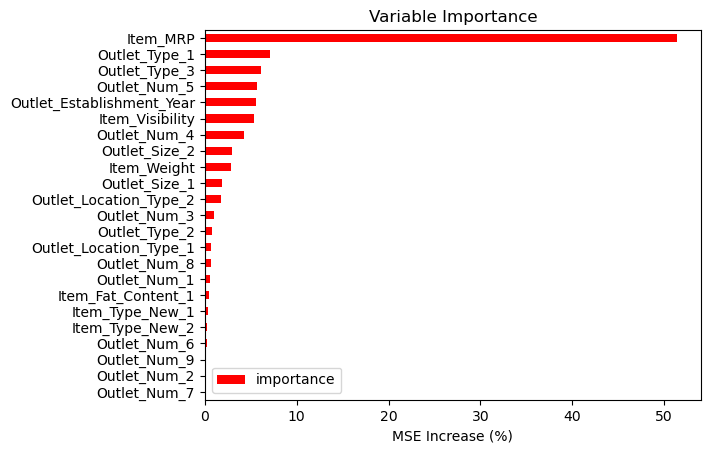

In [47]:
importance = pd.DataFrame({'importance':model1.feature_importances_ * 100}, 
                          index = X_train.columns)
importance.sort_values(by = 'importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.title('Variable Importance')
plt.xlabel('MSE Increase (%)')
plt.show()

In [48]:
#Create hyper-parameters grid
import itertools
n_estimators = [100, 200, 500]
max_features = ['sqrt', 'log2', None] #If None or 1.0, then max_features = n_features
max_depth = [2, 5, 10]
min_samples_leaf = [5, 10, 15]
params_grid = list(itertools.product(n_estimators, max_features, max_depth, min_samples_leaf))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 82), 
                           columns = ['n_estimators', 'max_features', 'max_depth', 'min_samples_leaf'])
params_grid

,n_estimators,max_features,max_depth,min_samples_leaf
1,100,sqrt,2,5
2,100,sqrt,2,10
3,100,sqrt,2,15
4,100,sqrt,5,5
5,100,sqrt,5,10
...,...,...,...,...
77,500,None,5,10
78,500,None,5,15
79,500,None,10,5
80,500,None,10,10


In [49]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

import time #to measure the processing time
start_time = time.time()
cv_errors = np.zeros(shape = len(params_grid)) #to save cv results
for i in range(len(params_grid)):
    rf_reg = RandomForestRegressor(n_estimators = params_grid.iloc[i, 0],
                                   max_features = params_grid.iloc[i, 1], 
                                   criterion = 'squared_error',
                                   max_depth = params_grid.iloc[i, 2], 
                                   min_samples_leaf = params_grid.iloc[i, 3], 
                                   ccp_alpha = 0)
    scores = cross_val_score(estimator = rf_reg, 
                             X = X_train, 
                             y = y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

cv_errors

The Processing time is:  179.35075044631958 seconds


array([-1462.7462508 , -1464.65240912, -1456.06613905, -1233.43003255,
       -1231.41130646, -1222.21805251, -1124.56623669, -1127.59574829,
       -1129.81463208, -1454.08069518, -1464.60833243, -1472.9145584 ,
       -1222.07619961, -1217.16139695, -1232.74983897, -1123.51017631,
       -1128.64983702, -1130.04507061, -1355.46451373, -1353.02979839,
       -1354.06624029, -1093.43745031, -1093.84806094, -1093.52535827,
       -1110.68098157, -1107.65121907, -1102.35564375, -1466.97424559,
       -1465.62115675, -1463.7003536 , -1224.68332136, -1227.93923305,
       -1230.37188444, -1122.50988987, -1125.77771095, -1129.46449205,
       -1461.07257739, -1449.23553226, -1460.12411103, -1226.72067988,
       -1229.03398816, -1222.62102908, -1123.79837714, -1125.1940703 ,
       -1130.06810539, -1355.17801899, -1354.79487891, -1355.2206056 ,
       -1094.07369061, -1093.96660335, -1093.37840238, -1109.23428247,
       -1105.73110353, -1101.6622803 , -1462.90027879, -1460.51009229,
      

In [50]:
#Best model
params_grid.iloc[np.argmax(cv_errors), :]

n_estimators         200
max_features        None
max_depth              5
min_samples_leaf      15
Name: 51, dtype: object

In [51]:
rf_reg = RandomForestRegressor(n_estimators = params_grid.iloc[np.argmax(cv_errors), 0],
                               max_features = params_grid.iloc[np.argmax(cv_errors), 1], 
                               criterion = 'squared_error',
                               max_depth = params_grid.iloc[np.argmax(cv_errors), 2], 
                               min_samples_leaf = params_grid.iloc[np.argmax(cv_errors), 3], 
                               ccp_alpha = 0,
                               random_state = 42)
model_2 = rf_reg.fit(X_train, y_train)

#Prediction using model 2
y_predict_rf = model_2.predict(X_test)


In [52]:
#Absolute error
abs_err_rf = abs(y_test - y_predict_rf)
abs_err_rf.mean()

726.3716676238618

In [53]:


#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'R2 score ' :  r2_score(y_test, y_predict_rf),
                                       'Mean of AbsErrors':    abs_err_rf.mean() ,
                                       'Median of AbsErrors' : abs_err_rf.median(),
                                       'SD of AbsErrors' :     abs_err_rf.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_rf),
                                       'Min of AbsErrors':     abs_err_rf.min(),
                                       'Max of AbsErrors':     abs_err_rf.max()}, 
                                      index = ['Random Forest'])])
models_comp

,R2 score,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LinearRegression,0.569414,802.405295,598.471733,737.819382,861.933773,0.616558,5484.392304
RidgeRegression,0.569449,802.325791,597.541155,737.841376,863.580075,0.383858,5484.636551
Random Forest,0.605069,726.371668,476.502813,749.836009,833.420686,0.034862,5576.955904
